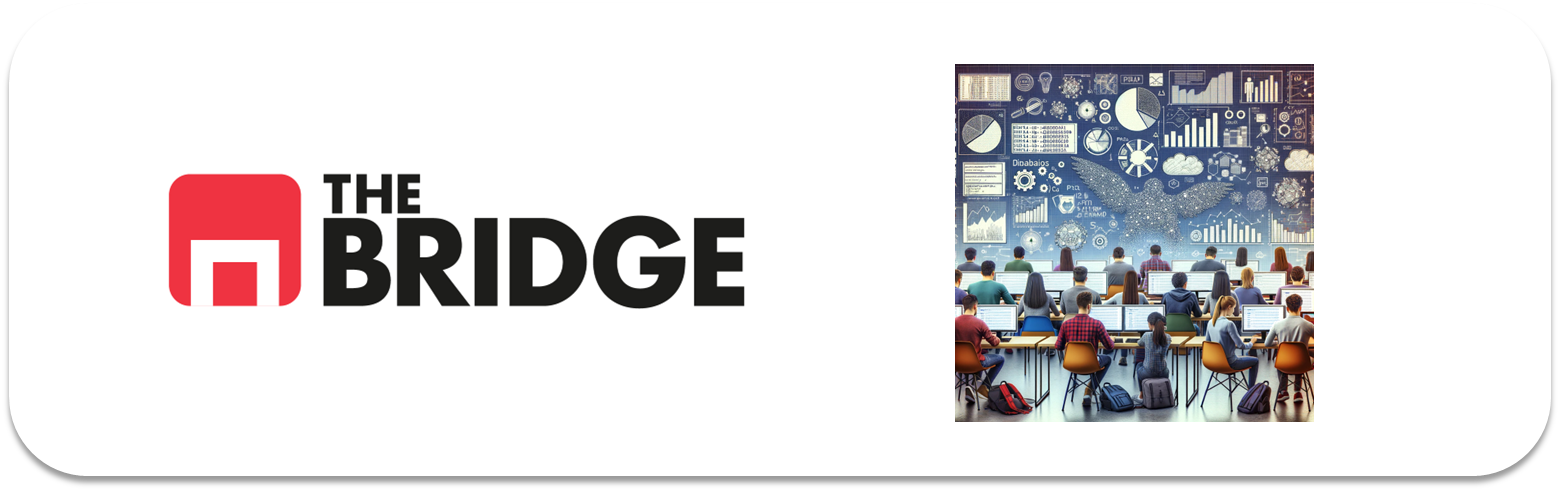

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [112]:
#importamos paquetes y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

**SOLUCION 1** Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

In [5]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter = "|")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


**SOLUCION 2** Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

In [6]:
target = "MEDV"

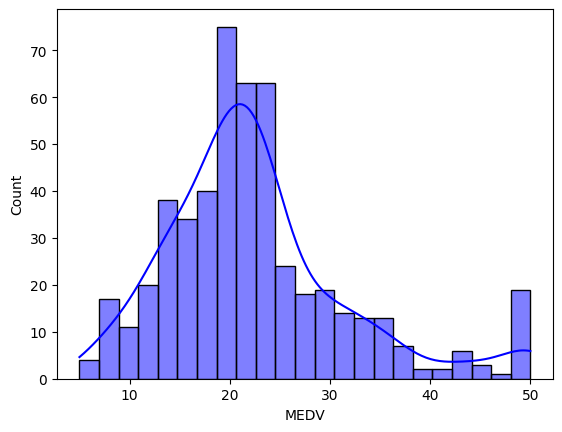

In [8]:
sns.histplot(df[target], color='Blue', kde = True)
plt.show()

*En la grafica de histograma y kde se aprecia una distribucion de los datos aproximada a una funcion normal (gaussiana) lo que hace a la muestra apropiada para construir un modelo de regresion lineal*

**SOLUCION 3** Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [13]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
print(len(train_set))
print(len(test_set))

404
102


**SOLUCION 4** Construye las parejas X,y de train y test

In [22]:
features = [col for col in df.describe().columns if col != target]
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [27]:
X_train = train_set.drop(columns = [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

**SOLUCION 5** Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

In [32]:
corr = train_set.corr()
np.abs(corr[target].sort_values(ascending = False))

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE        0.340216
CRIM       0.380091
RAD        0.387467
NOX        0.415768
TAX        0.459795
INDUS      0.470546
PTRATIO    0.491210
LSTAT      0.736422
Name: MEDV, dtype: float64

In [36]:
columnas = corr[target][np.abs(corr[target]) > 0.40].index.to_list()

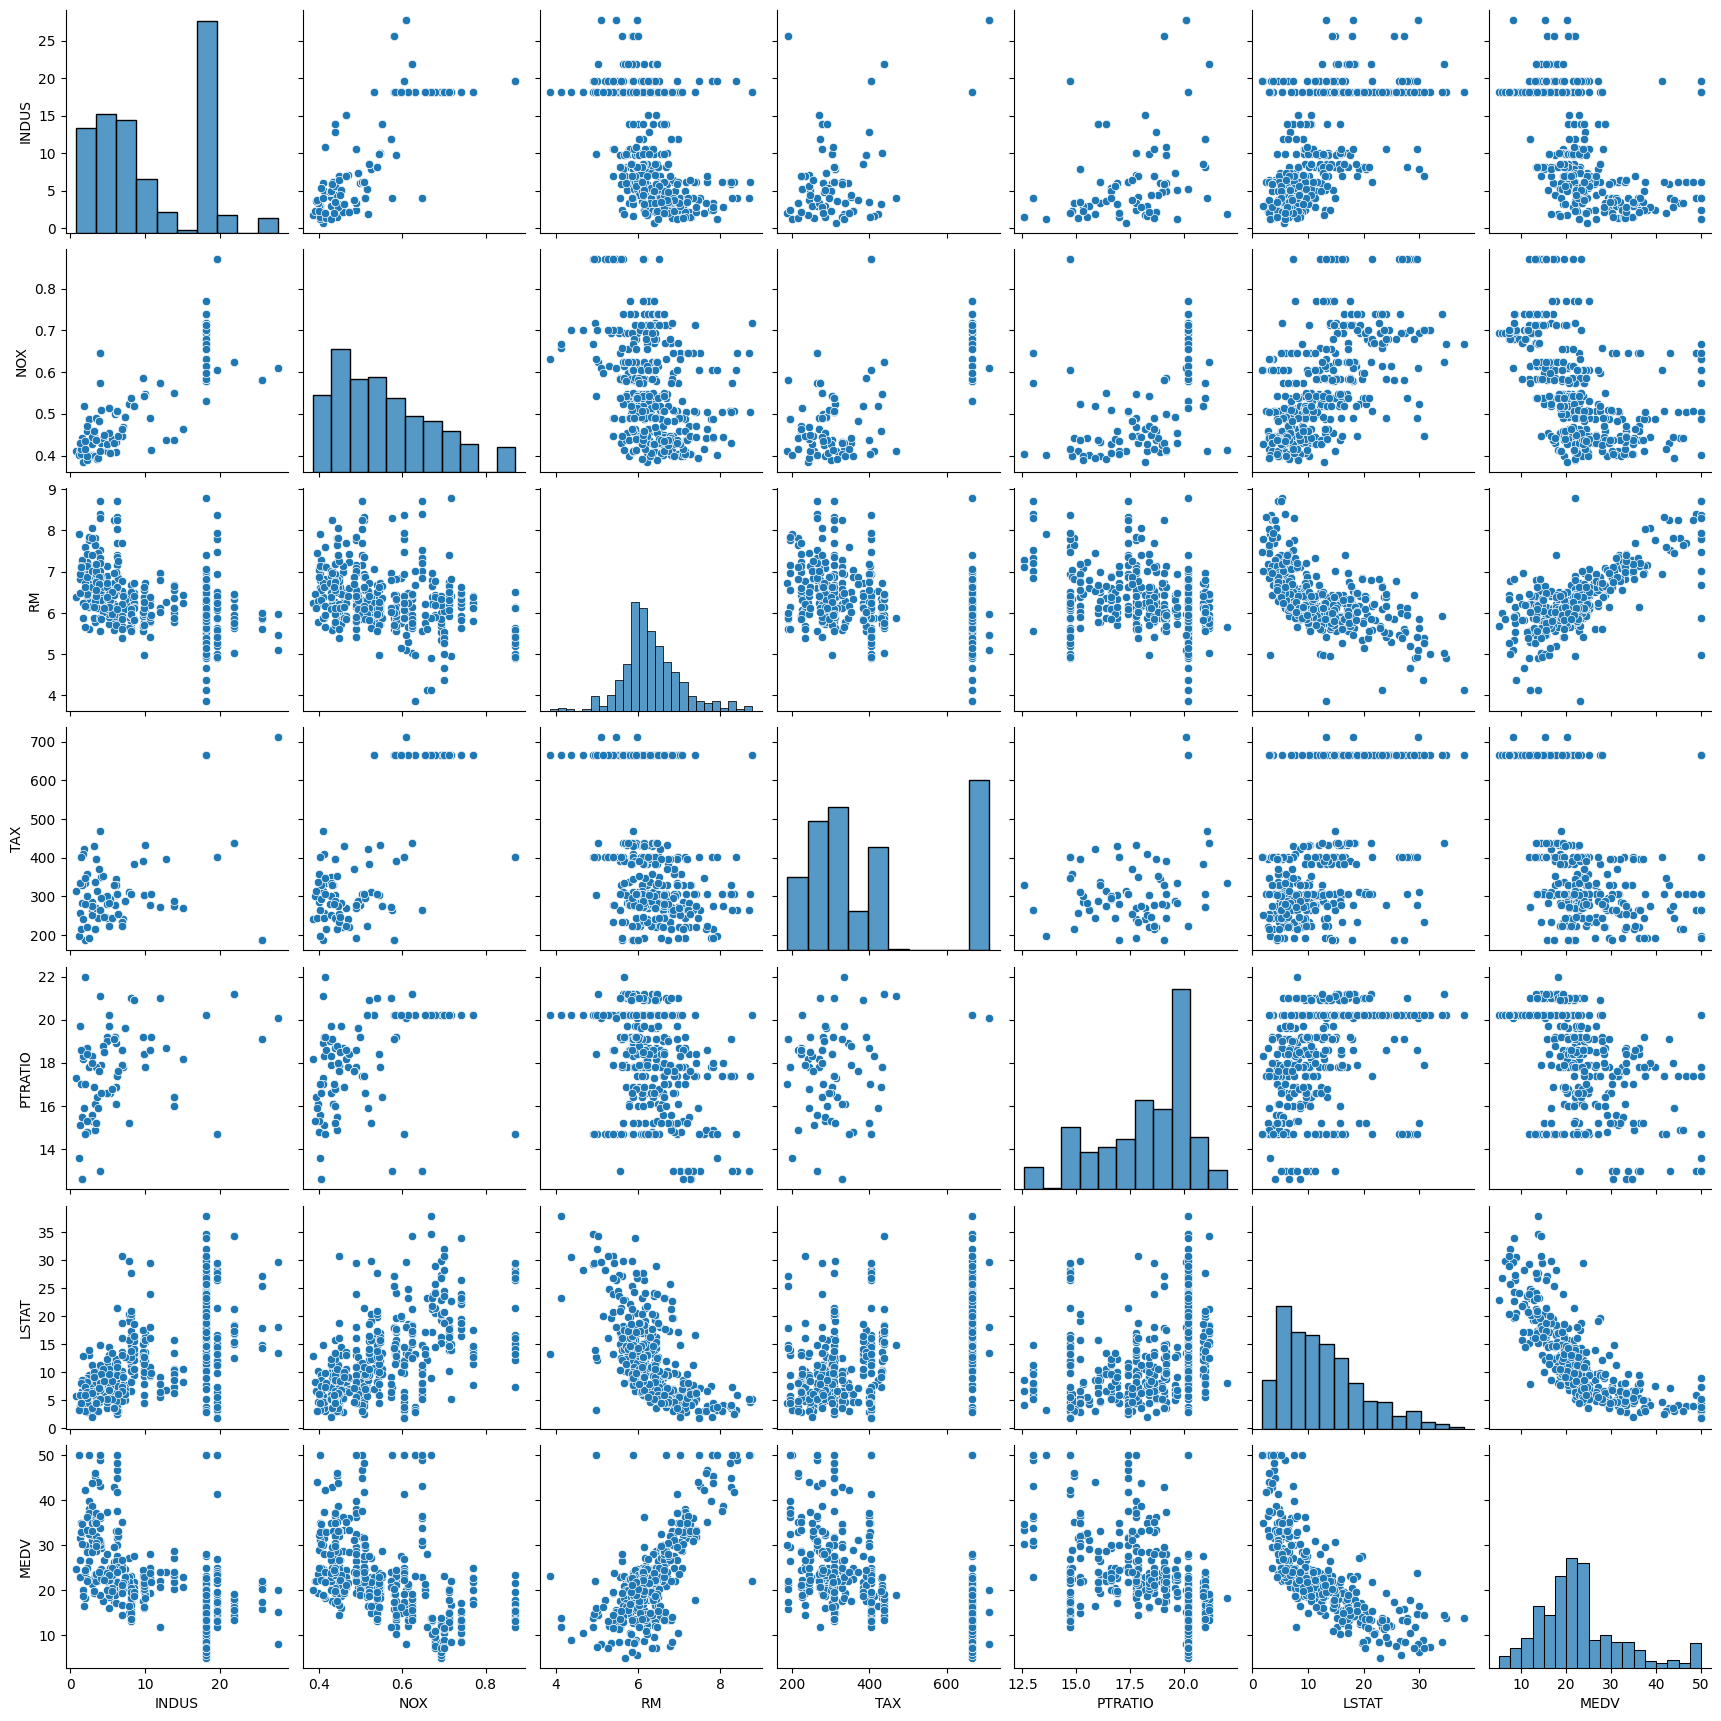

In [37]:
sns.pairplot(train_set[columnas]);

*Me quedo con las columnas con mayor indice de correlacion con respecto a MEDV (mayor de 0.40, ya se de correlacion positiva o negativa)*  

INDUS  
NOX  
RM  
TAX  
PTRATIO  
LSTAT


**SOLUCION 6** Trata las variables para que funcionen lo mejor posible en el modelo

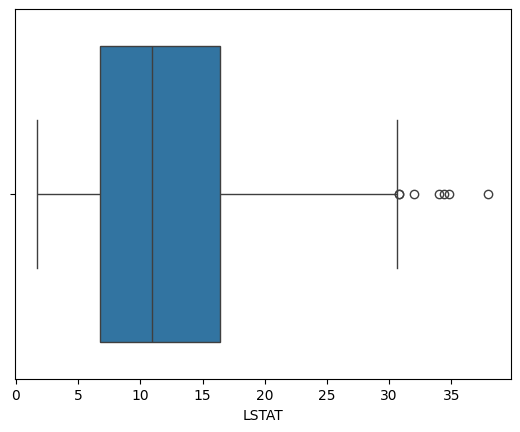

In [57]:
sns.boxplot(data = train_set["LSTAT"], orient = "h");

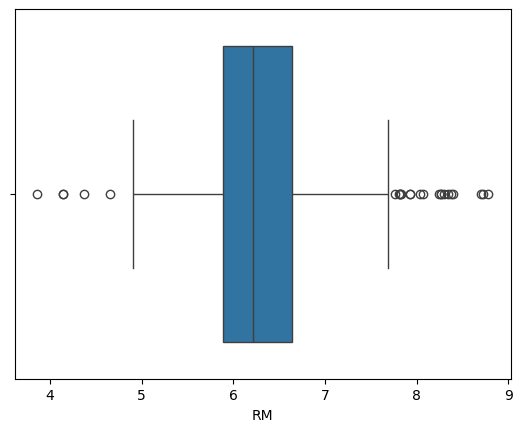

In [58]:
sns.boxplot(data = train_set["RM"], orient = "h");

*LSTAT y RM tienen outliers*

In [72]:
features_num = ["INDUS","NOX","RM","TAX","PTRATIO","LSTAT"]

In [73]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

**SOLUCION 7** Construye un modelo de regresión lineal.

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

**SOLUCION 8** Analiza si lo crees conveniente los pesos y la importancia de las features.

In [79]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
INDUS,0.839537
NOX,-0.343406
RM,3.641049
TAX,-0.755848
PTRATIO,-1.836370
LSTAT,-3.873840


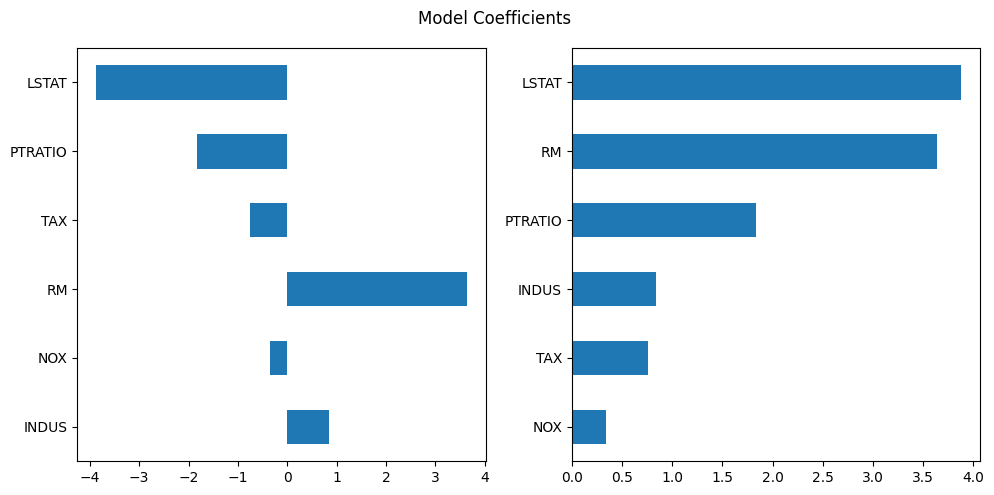

In [80]:
show_coefs(lin_reg)

**SOLUCION 9** Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [ ]:
Para Train

In [84]:
y_pred = lin_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_train, y_train))

MSE: 26.87007780207962
RMSE: 5.183635577669366
MAE: 3.6345436563095843
MAPE: 0.1852955006285334
R2: 0.6906984575653774


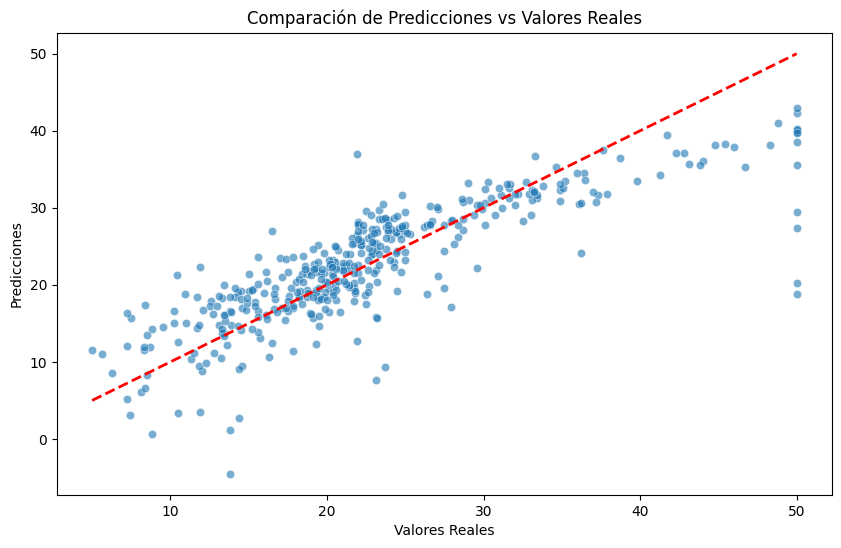

In [102]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

In [ ]:
Para Test

In [106]:
y_pred = lin_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_test, y_test))

MSE: 27.796815732022303
RMSE: 5.272268556515526
MAE: 3.354337919292544
MAPE: 0.17684027257812343
R2: 0.6209548378098446


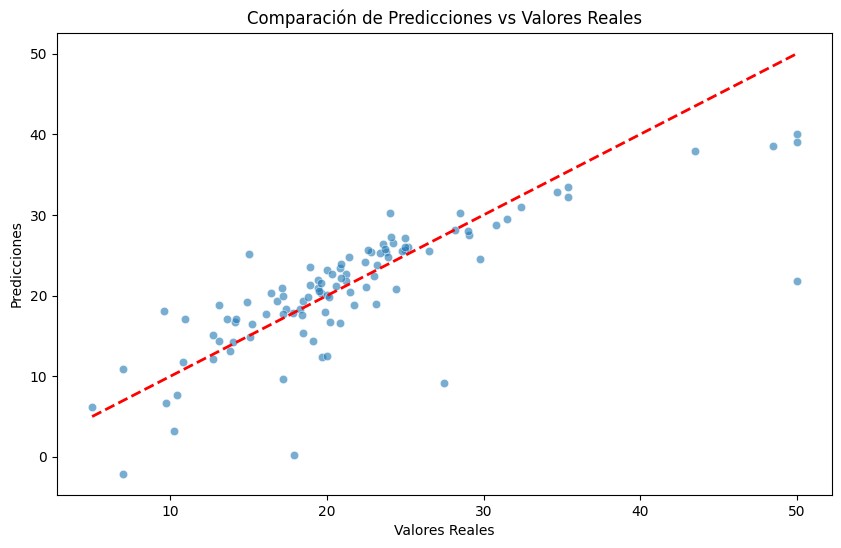

In [108]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs Valores Reales')
plt.show()

El modelo presenta una buena generalizacion. Ya que la variancia es baja.

**SOLUCION 10** Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización

In [153]:
elastic_reg = ElasticNet(alpha= 0.2, l1_ratio= 0.1)

elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.2, l1_ratio=0.1)

In [ ]:
Para train

In [141]:
y_pred = elastic_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_reg.score(X_train, y_train))

MSE: 27.544043431261382
RMSE: 5.248241937188241
MAE: 3.652620343328856
MAPE: 0.18384387321649703
R2: 0.6829404372801624


In [ ]:
Para test

In [152]:
y_pred = elastic_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_reg.score(X_test, y_test))

MSE: 27.611913868919668
RMSE: 5.2547039753843094
MAE: 3.4049460426282105
MAPE: 0.17392569722886858
R2: 0.6234762113860366


In [ ]:
El modelo de regularion Elastic Net  mejora un poco los resultados

,coefs
INDUS,0.075189
NOX,-0.292475
RM,3.242316
TAX,-0.652902
PTRATIO,-1.680508
LSTAT,-3.201449


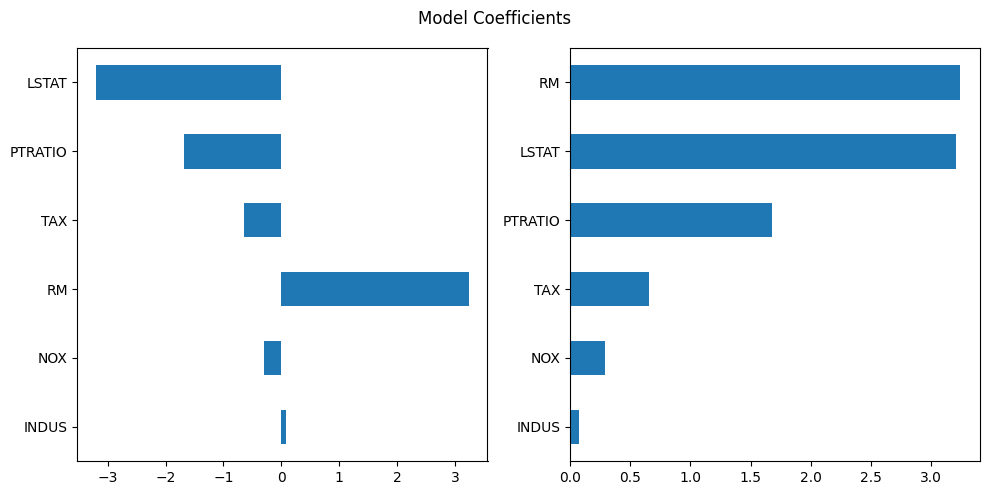

In [154]:
show_coefs(elastic_reg)

**SOLUCION 11**  Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

Me quedo con el modelo Elastic Net porque mejora un poco los resultados.